## Model Training

### Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [13]:
df = pd.read_csv("processed_walmart.csv")

In [27]:
df_model=df.drop(columns=['Date'])

### Preparing X and y variable

In [28]:
X = df_model.drop(columns=['Weekly_Sales'],axis=1)

In [29]:
X.head()

,Store,Holiday_Flag,Fuel_Price,CPI,Unemployment,Temperature_C,Year,Month_Name
0,1,0,2.6,211.10,8.11,5.555556,2010,February
1,1,1,2.5,211.24,8.11,3.888889,2010,February
2,1,0,2.5,211.29,8.11,4.444444,2010,February
3,1,0,2.6,211.32,8.11,8.333333,2010,February
4,1,0,2.6,211.35,8.11,8.333333,2010,March


In [30]:
y=df['Weekly_Sales']

In [31]:
y

0       1643691
1       1641957
2       1611968
3       1409728
4       1554807
         ...   
6430     713174
6431     733455
6432     734464
6433     718126
6434     760281
Name: Weekly_Sales, Length: 6435, dtype: int64

In [35]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer =OneHotEncoder()

preprocessor=ColumnTransformer(
    [
    ("OnehotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [36]:
X=preprocessor.fit_transform(X)

In [38]:
X.shape

(6435, 19)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((5148, 19), (1287, 19))

### Create an Evaluate Function to give all metrics after model Training

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
warning

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 517588.2376
- Mean Absolute Error: 427323.8969
- R2 Score: 0.1563
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 518756.8131
- Mean Absolute Error: 432454.6845
- R2 Score: 0.1647


Lasso
Model performance for Training set
- Root Mean Squared Error: 517389.5703
- Mean Absolute Error: 427195.8939
- R2 Score: 0.1569
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 518340.7139
- Mean Absolute Error: 431938.9635
- R2 Score: 0.1660


Ridge
Model performance for Training set
- Root Mean Squared Error: 517389.6274
- Mean Absolute Error: 427195.2660
- R2 Score: 0.1569
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 518338.4896
- Mean Absolute Error: 431936.4747
- R2 Score: 0.1660


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 343283.3281
- Mean 

NameError: name 'warning' is not defined

## Results

In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.96
6,XGBRegressor,0.96
5,Random Forest Regressor,0.95
4,Decision Tree,0.92
3,K-Neighbors Regressor,0.39
8,AdaBoost Regressor,0.38
2,Ridge,0.17
1,Lasso,0.17
0,Linear Regression,0.16


### CatBoostRegressor

In [47]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=8,
    loss_function='RMSE',
    verbose=0
)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score of CatBoost Model: {r2:.4f}")

R2 Score of CatBoost Model: 0.9640


### Plot y_pred and y_test

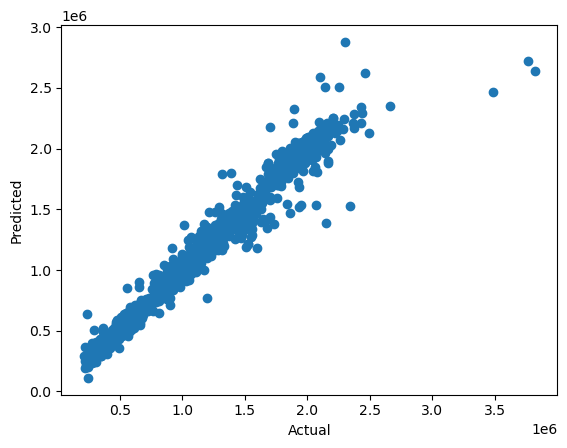

In [48]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

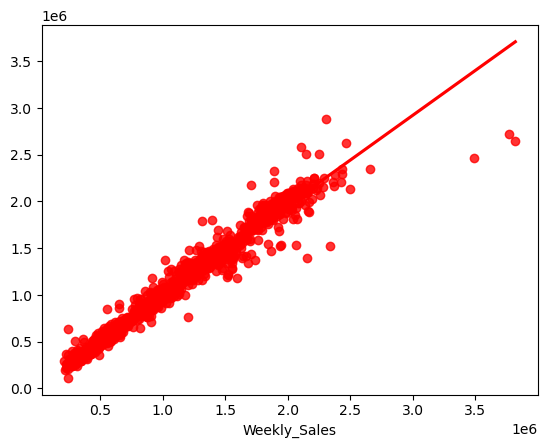

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [53]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2436,1138800,"1,105,775.03","33,024.97"
3361,1304851,"1,377,549.71","-72,698.71"
233,1769296,"1,845,618.77","-76,322.77"
3667,1077640,"1,011,676.13","65,963.87"
5011,428852,"455,828.96","-26,976.96"
...,...,...,...
2600,1492061,"1,468,276.29","23,784.71"
6308,801098,"810,373.15","-9,275.15"
6292,890690,"778,511.59","112,178.41"
151,2066188,"1,932,225.23","133,962.77"


The model predictions are closely aligned with actual weekly sales values, with most prediction errors lying within a small margin relative to total sales volume. The high R² score (~96%) indicates that the model effectively captures the underlying patterns in the data. Minor deviations can be attributed to external factors such as seasonal demand, promotional events, and regional store variations.